In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from keras.models import Model , Sequential
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from glob import glob 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
keras.__version__

'2.4.3'

#Load Data

In [ ]:
train_path = "/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train"
valid_path = "/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/validation"

#Data Preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

dir_path = "/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/horses"
for j in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+j)
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  i = 0

  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Horse_human_dataset/Hourse', save_prefix='hourse', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# img = load_img('/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/horses')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='/content/drive/MyDrive/Colab Notebooks/Projects', save_prefix='hourse', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

KeyboardInterrupt: ignored

In [ ]:
dir_path = "/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/validation/horses"
for i in os.listdir(dir_path):
  print(i)
  img = image.load_img(dir_path+'//'+i)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1027 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 256 images belonging to 2 classes.


In [ ]:
 def plotImages(images_arr):
   fig,axes = plt.subplots(1,5,figsize=(20,20))
   axes = axes.flatten()
   for img,ax in zip(images_arr,axes):
     ax.imshow(img)
   plt.tight_layout()
   plt.show()

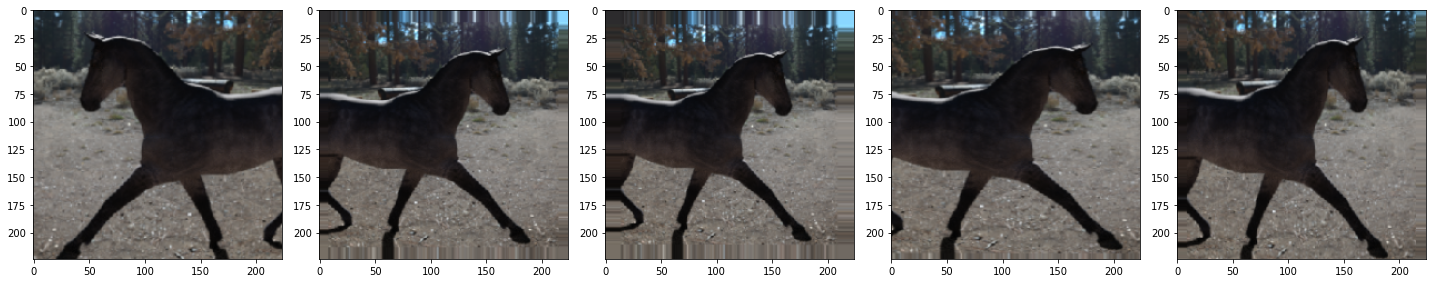

In [ ]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
image_size = [224,224]

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=image_size+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:

#Dont train existing weights

for layer in vgg19.layers:
  layer.trainable=False

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#useful for getting number of op classes

folders = glob('/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/humans',
 '/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/horses']

In [ ]:
x = Flatten()(vgg19.output)

In [1]:
prediction = Dense(len(folders),activation='softmax')(x)

NameError: ignored

In [ ]:
#create model object
model = Model(inputs=vgg19.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
training_dataset.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
#Checkpoint
model_path = "/content/drive/MyDrive/Models/horse_human_vgg19_Cnn.h5"
Checkpoints=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_lists= [Checkpoints]

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_lists
)

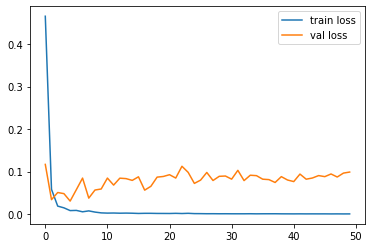

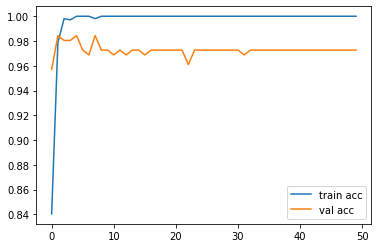

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##Model Import

In [ ]:
model1_path = "/content/drive/MyDrive/Models/horse_human_vgg19_Cnn.h5"

In [ ]:
model1 = keras.models.load_model(model1_path)

In [ ]:
#horse image path
h1='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/download (1).jfif'
h2='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/download.jfif'
h3='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/h1.jfif'
h4='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/images (1).jfif'
h5='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/images.jfif'
#human image path
hu1='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (2).jfif'
hu2='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (3).jfif'
hu3='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (4).jfif'
hu4='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (6).jfif'
hu5='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (5).jfif'

In [ ]:
def pred_human_horse(model,hores_human):
  test_image = image.load_img(hores_human,target_size=(224,224))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image,axis=0)

  result=model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result,"------->>>>",pred)

  if pred==0:
    print("Predictes -->>Horse")
  else:
    print("Predicted---->>>Human")
    

In [ ]:
for data in [h1,h2,h3,h4,h5,hu1,hu2,hu3,hu4,hu5]:
  pred_human_horse(model1,data)

[[0.989 0.011]] ------->>>> 0
Predictes -->>Horse
[[0.986 0.014]] ------->>>> 0
Predictes -->>Horse
[[0.936 0.064]] ------->>>> 0
Predictes -->>Horse
[[0.967 0.033]] ------->>>> 0
Predictes -->>Horse
[[1. 0.]] ------->>>> 0
Predictes -->>Horse
[[0.064 0.936]] ------->>>> 1
Predicted---->>>Human
[[0.124 0.876]] ------->>>> 1
Predicted---->>>Human
[[0.004 0.996]] ------->>>> 1
Predicted---->>>Human
[[0.493 0.507]] ------->>>> 1
Predicted---->>>Human
[[0.004 0.996]] ------->>>> 1
Predicted---->>>Human


##Build CNN Model

In [ ]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32 , kernel_size=3,input_shape=[224,224,3]),
                                      #  keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Conv2D(filters=64 , kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     
                                     keras.layers.Conv2D(filters=128 , kernel_size=6),
                                    #keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       
                              
                                     keras.layers.Conv2D(filters=256 , kernel_size=6),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Conv2D(filters=256 , kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),


                                     keras.layers.Dropout(0.25),
                                     keras.layers.Flatten(), #Neural network

                                     keras.layers.Dense(units=128,activation='relu'),
                                     keras.layers.Dropout(0.1),

                                     keras.layers.Dense(units=128,activation='relu'),
                                     keras.layers.Dropout(0.20),

                                     keras.layers.Dense(units=256,activation='relu'),
                                     keras.layers.Dropout(0.25),

                                     keras.layers.Dense(units=256,activation='relu'),
                                     keras.layers.Dropout(0.20),

                                     keras.layers.Dense(units=2,activation='softmax') #output layer

])

In [ ]:
# tell the model what cost and optimization method to use
cnn_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Checkpoint
model_path = "/content/drive/MyDrive/Models/human_horse_prediction_cnn.h5"
Checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list= [Checkpoint]

In [ ]:
# #train Model

# model_history= cnn_model.fit(training_set,epochs=20,verbose =1,validation_data=test_set,callbacks=callbacks_list )

# fit the model
# Run the cell. It will take some time to execute
model2 = cnn_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

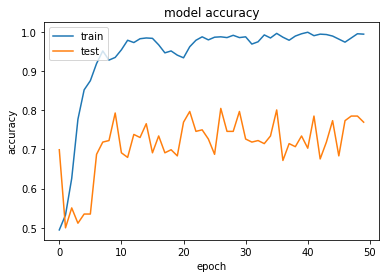

In [ ]:
#Summarize history for accuracy
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc="upper left")
plt.show()

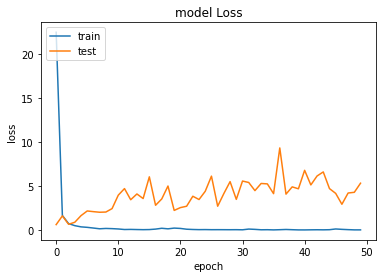

In [ ]:
#Summarize history for Loss
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title("model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc="upper left")
plt.show()

##Model Import

In [ ]:
model2_path = "/content/drive/MyDrive/Models/human_horse_prediction_cnn.h5"

In [ ]:
model2 = keras.models.load_model(model2_path)

##Preprocessing

In [ ]:
#horse image path
h1='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/download (1).jfif'
h2='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/download.jfif'
h3='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/h1.jfif'
h4='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/images (1).jfif'
h5='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/horse/images.jfif'
#human image path
hu1='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (2).jfif'
hu2='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (3).jfif'
hu3='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (4).jfif'
hu4='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (6).jfif'
hu5='/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/TestData/Human/images (5).jfif'

In [ ]:
def pred_human_horse(model,hores_human):
  test_image = image.load_img(hores_human,target_size=(224,224))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image,axis=0)

  result=model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result,"------->>>>",pred)

  if pred==0:
    print("Predictes -->>Horse")
  else:
    print("Predicted---->>>Human")
    

In [ ]:
for data in [h1,h2,h3,h4,h5,hu1,hu2,hu3,hu4,hu5]:
  pred_human_horse(model2,data)

[[0.016 0.984]] ------->>>> 1
Predicted---->>>Human
[[1. 0.]] ------->>>> 0
Predictes -->>Horse
[[0. 1.]] ------->>>> 1
Predicted---->>>Human
[[0.884 0.116]] ------->>>> 0
Predictes -->>Horse
[[1. 0.]] ------->>>> 0
Predictes -->>Horse
[[0. 1.]] ------->>>> 1
Predicted---->>>Human
[[0.001 0.999]] ------->>>> 1
Predicted---->>>Human
[[0. 1.]] ------->>>> 1
Predicted---->>>Human
[[1. 0.]] ------->>>> 0
Predictes -->>Horse
[[1. 0.]] ------->>>> 0
Predictes -->>Horse
